# Market Basket Data 

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("online_retail.csv")
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [4]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [5]:
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12/9/2011 12:50,4.95,12680.0,France


In [6]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [7]:
df['InvoiceNo'].nunique()

25900

In [8]:
df['StockCode'].nunique()

4070

In [9]:
df['Description'].nunique()

4223

In [10]:
df['InvoiceNo']

0         536365
1         536365
2         536365
3         536365
4         536365
           ...  
541904    581587
541905    581587
541906    581587
541907    581587
541908    581587
Name: InvoiceNo, Length: 541909, dtype: object

In [11]:
df['UnitPrice']

0         2.55
1         3.39
2         2.75
3         3.39
4         3.39
          ... 
541904    0.85
541905    2.10
541906    4.15
541907    4.15
541908    4.95
Name: UnitPrice, Length: 541909, dtype: float64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [13]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [14]:
print(df.shape)
df['InvoiceNo'].value_counts()

(541909, 8)


InvoiceNo
573585     1114
581219      749
581492      731
580729      721
558475      705
           ... 
554023        1
554022        1
554021        1
554020        1
C558901       1
Name: count, Length: 25900, dtype: int64

# Data Visulization

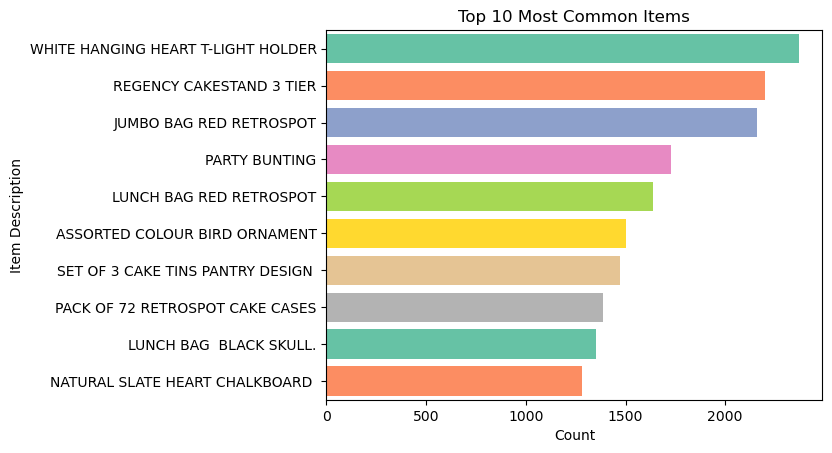

In [16]:
top_items = df['Description'].value_counts().head(10)
colors = sns.color_palette("Set2", len(top_items))  # Generate a list of unique colors
ax = sns.barplot(x=top_items.values, y=top_items.index)
for i, bar in enumerate(ax.patches):
    bar.set_facecolor(colors[i])  
plt.title("Top 10 Most Common Items")
plt.xlabel("Count")
plt.ylabel("Item Description")
plt.show()

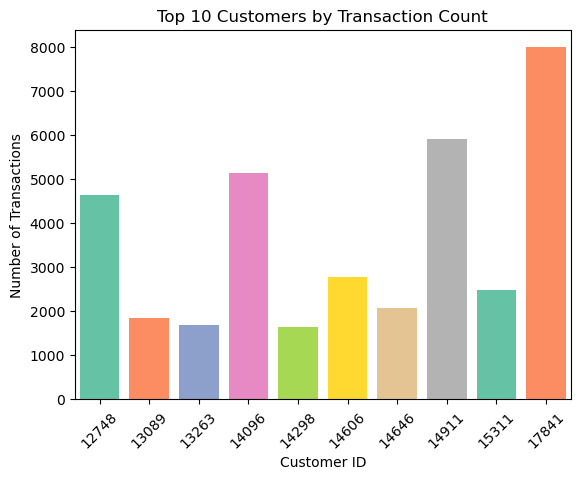

In [17]:
top_customers = df['CustomerID'].value_counts().head(10)
colors = sns.color_palette("Set2", len(top_customers))  
ax = sns.barplot(x=top_customers.index.astype(int), y=top_customers.values)
for i, bar in enumerate(ax.patches):
    bar.set_facecolor(colors[i])  
plt.title("Top 10 Customers by Transaction Count")
plt.xlabel("Customer ID")
plt.ylabel("Number of Transactions")
plt.xticks(rotation=45)
plt.show()

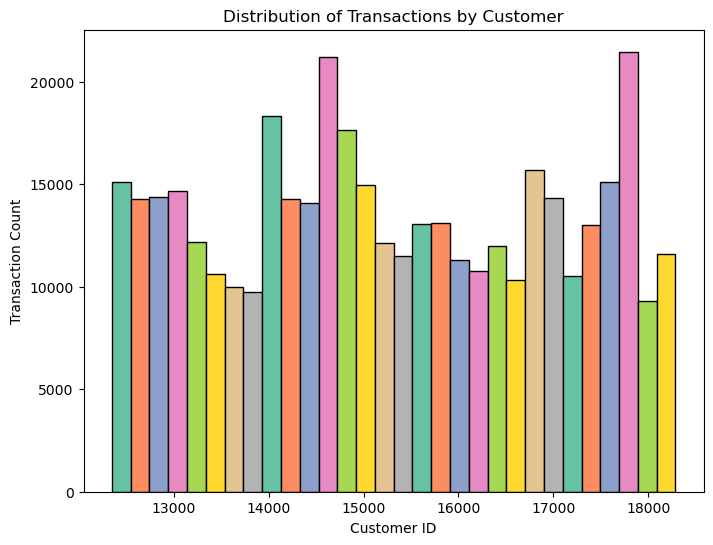

In [18]:
df_clean = df.dropna(subset=['CustomerID']).copy()  # Make a full copy
df_clean['CustomerID'] = pd.to_numeric(df_clean['CustomerID'], errors='coerce')
plt.figure(figsize=(8, 6))
bin_edges = np.histogram(df_clean['CustomerID'], bins=30)[1]
ax = sns.histplot(df_clean['CustomerID'], bins=bin_edges, kde=False)
palette = sns.color_palette("Set2", len(bin_edges) - 1)
for i, patch in enumerate(ax.patches):
    patch.set_facecolor(palette[i % len(palette)])
plt.title("Distribution of Transactions by Customer")
plt.xlabel("Customer ID")
plt.ylabel("Transaction Count")
plt.show()



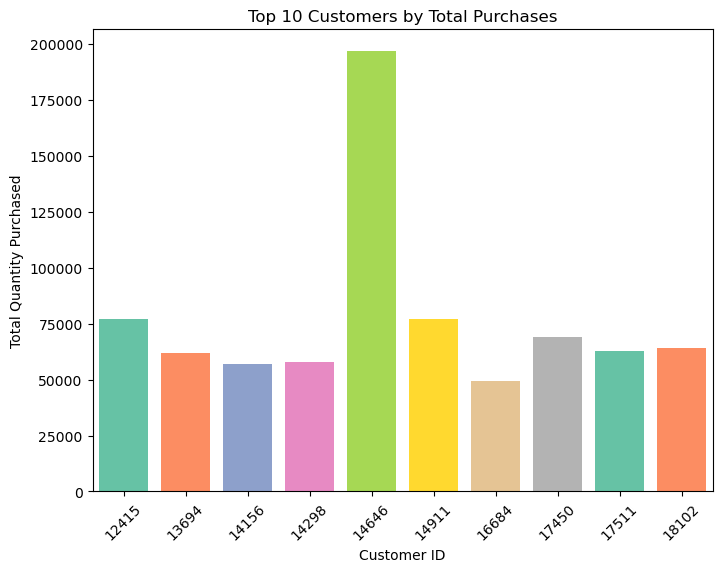

In [19]:
customer_totals = df.groupby('CustomerID')['Quantity'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=customer_totals.index.astype(int), y=customer_totals.values)
colors = sns.color_palette("Set2", len(customer_totals))  
for i, patch in enumerate(ax.patches):
    patch.set_facecolor(colors[i])  
plt.title("Top 10 Customers by Total Purchases")
plt.xlabel("Customer ID")
plt.ylabel("Total Quantity Purchased")
plt.xticks(rotation=45)
plt.show()

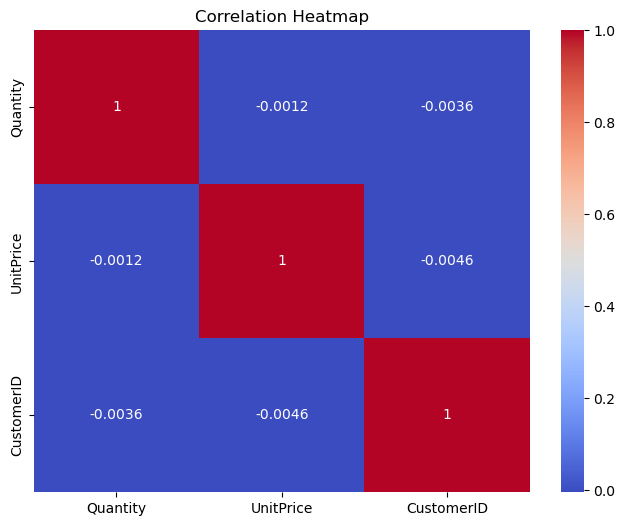

In [20]:
plt.figure(figsize=(8, 6))
sns.heatmap(df[['Quantity', 'UnitPrice', 'CustomerID']].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


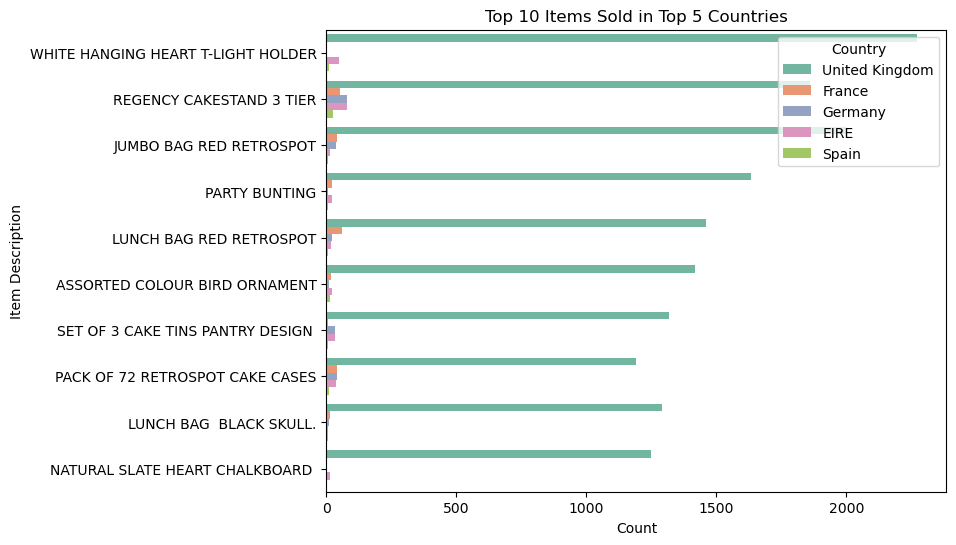

In [21]:
top_countries = df['Country'].value_counts().head(5).index
filtered_data = df[df['Country'].isin(top_countries)]

plt.figure(figsize=(8, 6))
sns.countplot(y='Description', hue='Country', data=filtered_data, 
              order=df['Description'].value_counts().head(10).index, palette="Set2")
plt.title("Top 10 Items Sold in Top 5 Countries")
plt.xlabel("Count")
plt.ylabel("Item Description")
plt.legend(title="Country", loc="upper right")
plt.show()


In [22]:
place_df = df['Country'].value_counts().reset_index()
place_df.columns = ['Country', 'Count']
place_df


,Country,Count
0,United Kingdom,495478
1,Germany,9495
2,France,8557
3,EIRE,8196
4,Spain,2533
5,Netherlands,2371
6,Belgium,2069
7,Switzerland,2002
8,Portugal,1519
9,Australia,1259


In [23]:
payment_df = df['Description'].value_counts().reset_index()
payment_df.columns = ['Description', 'Count']
payment_df


,Description,Count
0,WHITE HANGING HEART T-LIGHT HOLDER,2369
1,REGENCY CAKESTAND 3 TIER,2200
2,JUMBO BAG RED RETROSPOT,2159
3,PARTY BUNTING,1727
4,LUNCH BAG RED RETROSPOT,1638
...,...,...
4218,Missing,1
4219,historic computer difference?....se,1
4220,DUSTY PINK CHRISTMAS TREE 30CM,1
4221,WRAP BLUE RUSSIAN FOLKART,1


# Apriori Algorithm

# Apriori is an algorithm for frequent item set mining and association rule learning over relational databases. It proceeds by identifying the frequent individual items in the database and extending them to larger and larger item sets as long as those item sets appear sufficiently often in the database. The frequent item sets determined by Apriori can be used to determine association rules which highlight general trends in the database.

In [26]:
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

#  Loading data : We will use the encoding as latin1 to read this file as there are some special character in this file.

In [28]:
df = pd.read_csv("online_retail.csv", encoding='utf-8-sig')
df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [29]:
df.shape

(541909, 8)

In [30]:
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [31]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


# Data Cleaning

# First, some of the descriptions have spaces that need to be removed. We’ll also drop the rows that don’t have invoice numbers remove the credit transactions (those with invoice numbers containing C).

In [34]:
import pandas as pd
df = pd.read_csv("online_retail.csv")
df
df['Description'] = df['Description'].str.strip() 
df.dropna(axis=0, subset=['InvoiceNo'], inplace=True)
df['InvoiceNo'] = df['InvoiceNo'].astype('str') 
df = df[~df['InvoiceNo'].str.contains('C')] 

In [35]:
df.shape

(532621, 8)

#  Switzerland


In [37]:
basket = (df[df['Country'] =="Switzerland"]       
          .groupby(['InvoiceNo', 'Description'])['Quantity'] 
          .sum().unstack().reset_index().fillna(0) 
          .set_index('InvoiceNo')) 

In [38]:
basket.head()

Description,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE SKULLS,12 PENCILS TALL TUBE WOODLAND,12 RED ROSE PEG PLACE SETTINGS,15CM CHRISTMAS GLASS BALL 20 LIGHTS,...,WRAP MAGIC FOREST,WRAP PAISLEY PARK,WRAP PINK FAIRY CAKES,WRAP RED APPLES,WRAP RED VINTAGE DOILY,WRAP SUKI AND FRIENDS,YELLOW METAL CHICKEN HEART,YOU'RE CONFUSING ME METAL SIGN,ZINC METAL HEART DECORATION,ZINC WILLIE WINKIE CANDLE STICK
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536858,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
539488,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
541518,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
541569,0.0,0.0,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
542586,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# There are a lot of zeros in the data but we also need to make sure any positive values are converted to a 1 and anything less the 0 is set to 0.   so were converting into boolean type

In [40]:
#below function converts a values < 0 to 0 and value greater than equal 1 to 1.  
def encode_units(x):
    if x <= 0:
        return 0
    elif x >= 1:
        return 1

In [41]:
basket_sets = basket.apply(lambda col: col.map(encode_units))
basket_sets = basket_sets.astype(bool)

In [42]:
basket_sets.head()

Description,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE SKULLS,12 PENCILS TALL TUBE WOODLAND,12 RED ROSE PEG PLACE SETTINGS,15CM CHRISTMAS GLASS BALL 20 LIGHTS,...,WRAP MAGIC FOREST,WRAP PAISLEY PARK,WRAP PINK FAIRY CAKES,WRAP RED APPLES,WRAP RED VINTAGE DOILY,WRAP SUKI AND FRIENDS,YELLOW METAL CHICKEN HEART,YOU'RE CONFUSING ME METAL SIGN,ZINC METAL HEART DECORATION,ZINC WILLIE WINKIE CANDLE STICK
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536858,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
539488,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
541518,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
541569,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
542586,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [43]:
frequent_itemsets = apriori(basket_sets, min_support=0.07, use_colnames=True)

# The final step is to generate the rules with their corresponding support, confidence and lift.

In [45]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1,num_itemsets=None)
rules = rules.drop(['zhangs_metric', 'jaccard', 'certainty', 'kulczynski'], axis=1, errors='ignore')
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction
0,(PLASTERS IN TIN SPACEBOY),(5 HOOK HANGER RED MAGIC TOADSTOOL),0.333333,0.092593,0.074074,0.222222,2.400000,1.0,0.043210,1.166667
1,(5 HOOK HANGER RED MAGIC TOADSTOOL),(PLASTERS IN TIN SPACEBOY),0.092593,0.333333,0.074074,0.800000,2.400000,1.0,0.043210,3.333333
2,(PLASTERS IN TIN WOODLAND ANIMALS),(5 HOOK HANGER RED MAGIC TOADSTOOL),0.314815,0.092593,0.074074,0.235294,2.541176,1.0,0.044925,1.186610
3,(5 HOOK HANGER RED MAGIC TOADSTOOL),(PLASTERS IN TIN WOODLAND ANIMALS),0.092593,0.314815,0.074074,0.800000,2.541176,1.0,0.044925,3.425926
4,(ASSORTED COLOUR BIRD ORNAMENT),(6 RIBBONS RUSTIC CHARM),0.092593,0.092593,0.074074,0.800000,8.640000,1.0,0.065501,4.537037


In [46]:
rules[(rules['lift'] >= 6) &
       (rules['confidence'] >= 0.8)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction
4,(ASSORTED COLOUR BIRD ORNAMENT),(6 RIBBONS RUSTIC CHARM),0.092593,0.092593,0.074074,0.8,8.64,1.0,0.065501,4.537037
5,(6 RIBBONS RUSTIC CHARM),(ASSORTED COLOUR BIRD ORNAMENT),0.092593,0.092593,0.074074,0.8,8.64,1.0,0.065501,4.537037
6,(RIBBON REEL STRIPES DESIGN),(6 RIBBONS RUSTIC CHARM),0.074074,0.092593,0.074074,1.0,10.80,1.0,0.067215,inf
7,(6 RIBBONS RUSTIC CHARM),(RIBBON REEL STRIPES DESIGN),0.092593,0.074074,0.074074,0.8,10.80,1.0,0.067215,4.629630
13,(PAPER BUNTING RETROSPOT),(BLUE HAPPY BIRTHDAY BUNTING),0.092593,0.111111,0.074074,0.8,7.20,1.0,0.063786,4.444444
...,...,...,...,...,...,...,...,...,...,...
3188,"(SET/20 RED RETROSPOT PAPER NAPKINS, SPACEBOY ...","(ROUND SNACK BOXES SET OF4 WOODLAND, WATERING ...",0.074074,0.092593,0.074074,1.0,10.80,1.0,0.067215,inf
3189,"(WATERING CAN BLUE ELEPHANT, RED TOADSTOOL LED...","(ROUND SNACK BOXES SET OF4 WOODLAND, SET/20 RE...",0.092593,0.074074,0.074074,0.8,10.80,1.0,0.067215,4.629630
3190,"(SPACEBOY LUNCH BOX, RED TOADSTOOL LED NIGHT L...","(WATERING CAN BLUE ELEPHANT, ROUND SNACK BOXES...",0.074074,0.074074,0.074074,1.0,13.50,1.0,0.068587,inf
3191,"(WATERING CAN BLUE ELEPHANT, SPACEBOY LUNCH BOX)","(ROUND SNACK BOXES SET OF4 WOODLAND, SET/20 RE...",0.074074,0.074074,0.074074,1.0,13.50,1.0,0.068587,inf


# Conclusion:  In looking at the rules, it seems that the red paper cups, napkins,Round snak boxes set  are purchased together in a manner that is higher than the overall probability would suggest.

# France

In [49]:
basket = (df[df['Country'] == "France"]
          .groupby(['InvoiceNo', 'Description'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('InvoiceNo'))


In [50]:
basket.head()

Description,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 EGG HOUSE PAINTED WOOD,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE WOODLAND,...,WRAP VINTAGE PETALS DESIGN,YELLOW COAT RACK PARIS FASHION,YELLOW GIANT GARDEN THERMOMETER,YELLOW SHARK HELICOPTER,ZINC STAR T-LIGHT HOLDER,ZINC FOLKART SLEIGH BELLS,ZINC HERB GARDEN CONTAINER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536370,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536852,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536974,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
537065,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
537463,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [51]:
def encode_units(x):
    if x <= 0:
        return 0
    elif x >= 1:
        return 1

In [52]:
basket_sets = basket.apply(lambda col: col.map(encode_units))
basket_sets = basket_sets.astype(bool)


In [53]:
basket_sets.head()

Description,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 EGG HOUSE PAINTED WOOD,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE WOODLAND,...,WRAP VINTAGE PETALS DESIGN,YELLOW COAT RACK PARIS FASHION,YELLOW GIANT GARDEN THERMOMETER,YELLOW SHARK HELICOPTER,ZINC STAR T-LIGHT HOLDER,ZINC FOLKART SLEIGH BELLS,ZINC HERB GARDEN CONTAINER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536370,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
536852,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
536974,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
537065,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
537463,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [54]:
frequent_itemsets = apriori(basket_sets, min_support=0.07, use_colnames=True)

In [55]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1,num_itemsets=None)
rules = rules.drop(['zhangs_metric', 'jaccard', 'certainty', 'kulczynski'], axis=1, errors='ignore')
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction
0,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE PINK),0.096939,0.102041,0.073980,0.763158,7.478947,1.0,0.064088,3.791383
1,(ALARM CLOCK BAKELIKE PINK),(ALARM CLOCK BAKELIKE GREEN),0.102041,0.096939,0.073980,0.725000,7.478947,1.0,0.064088,3.283859
2,(ALARM CLOCK BAKELIKE RED),(ALARM CLOCK BAKELIKE GREEN),0.094388,0.096939,0.079082,0.837838,8.642959,1.0,0.069932,5.568878
3,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED),0.096939,0.094388,0.079082,0.815789,8.642959,1.0,0.069932,4.916181
4,(POSTAGE),(ALARM CLOCK BAKELIKE GREEN),0.765306,0.096939,0.084184,0.110000,1.134737,1.0,0.009996,1.014676


In [56]:
rules[(rules['lift'] >= 6) &
       (rules['confidence'] >= 0.8)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction
2,(ALARM CLOCK BAKELIKE RED),(ALARM CLOCK BAKELIKE GREEN),0.094388,0.096939,0.079082,0.837838,8.642959,1.0,0.069932,5.568878
3,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED),0.096939,0.094388,0.079082,0.815789,8.642959,1.0,0.069932,4.916181
75,(SET/6 RED SPOTTY PAPER PLATES),(SET/20 RED RETROSPOT PAPER NAPKINS),0.127551,0.132653,0.102041,0.800000,6.030769,1.0,0.085121,4.336735
76,(SET/6 RED SPOTTY PAPER PLATES),(SET/6 RED SPOTTY PAPER CUPS),0.127551,0.137755,0.122449,0.960000,6.968889,1.0,0.104878,21.556122
77,(SET/6 RED SPOTTY PAPER CUPS),(SET/6 RED SPOTTY PAPER PLATES),0.137755,0.127551,0.122449,0.888889,6.968889,1.0,0.104878,7.852041
79,"(ALARM CLOCK BAKELIKE RED, POSTAGE)",(ALARM CLOCK BAKELIKE GREEN),0.086735,0.096939,0.071429,0.823529,8.495356,1.0,0.063021,5.117347
80,"(POSTAGE, ALARM CLOCK BAKELIKE GREEN)",(ALARM CLOCK BAKELIKE RED),0.084184,0.094388,0.071429,0.848485,8.989353,1.0,0.063483,5.977041
114,"(POSTAGE, SET/6 RED SPOTTY PAPER PLATES)",(SET/6 RED SPOTTY PAPER CUPS),0.107143,0.137755,0.102041,0.952381,6.913580,1.0,0.087281,18.107143
115,"(POSTAGE, SET/6 RED SPOTTY PAPER CUPS)",(SET/6 RED SPOTTY PAPER PLATES),0.117347,0.127551,0.102041,0.869565,6.817391,1.0,0.087073,6.688776
118,(SET/6 RED SPOTTY PAPER PLATES),"(POSTAGE, SET/6 RED SPOTTY PAPER CUPS)",0.127551,0.117347,0.102041,0.800000,6.817391,1.0,0.087073,4.413265


# In looking at the rules it seems that customer who buy alarm clock and backware that is green are also likely to purchase backware in pink,red,or both.

# Germany

In [59]:
basket = (df[df['Country'] =="Germany"]       
          .groupby(['InvoiceNo', 'Description'])['Quantity'] 
          .sum().unstack().reset_index().fillna(0) 
          .set_index('InvoiceNo')) 

In [60]:
basket.head()

Description,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE SKULLS,...,YULETIDE IMAGES GIFT WRAP SET,ZINC HEART T-LIGHT HOLDER,ZINC STAR T-LIGHT HOLDER,ZINC BOX SIGN HOME,ZINC FOLKART SLEIGH BELLS,ZINC HEART LATTICE T-LIGHT HOLDER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC WILLIE WINKIE CANDLE STICK
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536527,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536840,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536861,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536967,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536983,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [61]:
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1
basket_sets = basket.apply(lambda col: col.map(encode_units))


In [62]:
basket_sets.head()

Description,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE SKULLS,...,YULETIDE IMAGES GIFT WRAP SET,ZINC HEART T-LIGHT HOLDER,ZINC STAR T-LIGHT HOLDER,ZINC BOX SIGN HOME,ZINC FOLKART SLEIGH BELLS,ZINC HEART LATTICE T-LIGHT HOLDER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC WILLIE WINKIE CANDLE STICK
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536527,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536840,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536861,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536967,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536983,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [63]:
basket_sets = basket_sets.astype(bool)
frequent_itemsets = apriori(basket_sets, min_support=0.07, use_colnames=True)

In [64]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1,num_itemsets=None)
rules = rules.drop(['zhangs_metric', 'jaccard', 'certainty', 'kulczynski'], axis=1, errors='ignore')
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction
0,(POSTAGE),(6 RIBBONS RUSTIC CHARM),0.818381,0.102845,0.091904,0.112299,1.091933,1.0,0.007738,1.010651
1,(6 RIBBONS RUSTIC CHARM),(POSTAGE),0.102845,0.818381,0.091904,0.893617,1.091933,1.0,0.007738,1.707221
2,(POSTAGE),(JUMBO BAG WOODLAND ANIMALS),0.818381,0.100656,0.087527,0.106952,1.062544,1.0,0.005152,1.007049
3,(JUMBO BAG WOODLAND ANIMALS),(POSTAGE),0.100656,0.818381,0.087527,0.869565,1.062544,1.0,0.005152,1.392414
4,(POSTAGE),(PLASTERS IN TIN CIRCUS PARADE),0.818381,0.115974,0.100656,0.122995,1.060539,1.0,0.005746,1.008006


In [65]:
rules[(rules['lift'] >= 6) &
       (rules['confidence'] >= 0.8)]      

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction


# In looking at the rules, it seems that customers who buy Lunch Bag Spaceboy Design are also likely to purchase Lunch Bag Pink Polkadot. 

# Netherlands

In [68]:
basket = (df[df['Country'] =="Netherlands"]       
          .groupby(['InvoiceNo', 'Description'])['Quantity'] 
          .sum().unstack().reset_index().fillna(0) 
          .set_index('InvoiceNo')) 

In [69]:
basket.head()

Description,10 COLOUR SPACEBOY PEN,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE WOODLAND,16 PIECE CUTLERY SET PANTRY DESIGN,20 DOLLY PEGS RETROSPOT,200 RED + WHITE BENDY STRAWS,3 HEARTS HANGING DECORATION RUSTIC,3 HOOK HANGER MAGIC GARDEN,...,WRAP RED APPLES,WRAP WEDDING DAY,YELLOW METAL CHICKEN HEART,ZINC HEART T-LIGHT HOLDER,ZINC STAR T-LIGHT HOLDER,ZINC FOLKART SLEIGH BELLS,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC WILLIE WINKIE CANDLE STICK
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536403,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
539491,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
539731,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,192.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
541206,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
541570,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,192.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [70]:
basket.shape

(95, 803)

In [71]:
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1
basket_sets = basket.apply(lambda col: col.map(encode_units))



In [72]:
basket_sets.head()

Description,10 COLOUR SPACEBOY PEN,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE WOODLAND,16 PIECE CUTLERY SET PANTRY DESIGN,20 DOLLY PEGS RETROSPOT,200 RED + WHITE BENDY STRAWS,3 HEARTS HANGING DECORATION RUSTIC,3 HOOK HANGER MAGIC GARDEN,...,WRAP RED APPLES,WRAP WEDDING DAY,YELLOW METAL CHICKEN HEART,ZINC HEART T-LIGHT HOLDER,ZINC STAR T-LIGHT HOLDER,ZINC FOLKART SLEIGH BELLS,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC WILLIE WINKIE CANDLE STICK
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536403,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
539491,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
539731,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
541206,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
541570,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [73]:
basket_sets = basket_sets.astype(bool)
frequent_itemsets = apriori(basket_sets, min_support=0.07, use_colnames=True)



In [74]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1,num_itemsets=None)
rules = rules.drop(['zhangs_metric', 'jaccard', 'certainty', 'kulczynski'], axis=1, errors='ignore')
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction
0,(72 SWEETHEART FAIRY CAKE CASES),(DOLLY GIRL LUNCH BOX),0.105263,0.231579,0.094737,0.900000,3.886364,1.0,0.070360,7.684211
1,(DOLLY GIRL LUNCH BOX),(72 SWEETHEART FAIRY CAKE CASES),0.231579,0.105263,0.094737,0.409091,3.886364,1.0,0.070360,1.514170
2,(72 SWEETHEART FAIRY CAKE CASES),(ROUND SNACK BOXES SET OF 4 FRUITS),0.105263,0.178947,0.073684,0.700000,3.911765,1.0,0.054848,2.736842
3,(ROUND SNACK BOXES SET OF 4 FRUITS),(72 SWEETHEART FAIRY CAKE CASES),0.178947,0.105263,0.073684,0.411765,3.911765,1.0,0.054848,1.521053
4,(72 SWEETHEART FAIRY CAKE CASES),(ROUND SNACK BOXES SET OF4 WOODLAND),0.105263,0.263158,0.073684,0.700000,2.660000,1.0,0.045983,2.456140


In [75]:
rules[(rules['lift'] >= 6) &
       (rules['confidence'] >= 0.8)]      

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction
66,(LUNCH BAG RED RETROSPOT),(COWBOYS AND INDIANS BIRTHDAY CARD),0.105263,0.105263,0.084211,0.800000,7.600000,1.0,0.073130,4.473684
67,(COWBOYS AND INDIANS BIRTHDAY CARD),(LUNCH BAG RED RETROSPOT),0.105263,0.105263,0.084211,0.800000,7.600000,1.0,0.073130,4.473684
131,(FOOD CONTAINER SET 3 LOVE HEART),(STRAWBERRY LUNCH BOX WITH CUTLERY),0.094737,0.147368,0.084211,0.888889,6.031746,1.0,0.070249,7.673684
177,(LUNCH BAG RED RETROSPOT),(PLASTERS IN TIN SPACEBOY),0.105263,0.126316,0.084211,0.800000,6.333333,1.0,0.070914,4.368421
223,(LUNCH BOX WITH CUTLERY RETROSPOT),(STRAWBERRY LUNCH BOX WITH CUTLERY),0.105263,0.147368,0.094737,0.900000,6.107143,1.0,0.079224,8.526316
...,...,...,...,...,...,...,...,...,...,...
1797,"(PLASTERS IN TIN VINTAGE PAISLEY, DOLLY GIRL L...","(RED RETROSPOT CHARLOTTE BAG, ROUND SNACK BOXE...",0.073684,0.094737,0.073684,1.000000,10.555556,1.0,0.066704,inf
1800,"(PLASTERS IN TIN VINTAGE PAISLEY, ROUND SNACK ...","(RED RETROSPOT CHARLOTTE BAG, SPACEBOY LUNCH B...",0.084211,0.094737,0.073684,0.875000,9.236111,1.0,0.065706,7.242105
1801,"(PLASTERS IN TIN VINTAGE PAISLEY, SPACEBOY LUN...","(RED RETROSPOT CHARLOTTE BAG, ROUND SNACK BOXE...",0.084211,0.094737,0.073684,0.875000,9.236111,1.0,0.065706,7.242105
1816,"(STRAWBERRY LUNCH BOX WITH CUTLERY, ROUND SNAC...","(ROUND SNACK BOXES SET OF 4 FRUITS, SPACEBOY L...",0.084211,0.126316,0.073684,0.875000,6.927083,1.0,0.063047,6.989474


# In looking at the rules, it seems that customers who buy Lunch Bag Red Retrospot are also likely to purchase Cowboys and Indians Birthday Card.

# Australia

In [78]:
basket = (df[df['Country'] =="Australia"]       
          .groupby(['InvoiceNo', 'Description'])['Quantity'] 
          .sum().unstack().reset_index().fillna(0) 
          .set_index('InvoiceNo')) 

In [79]:
basket.head()

Description,10 COLOUR SPACEBOY PEN,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE RED RETROSPOT,16 PIECE CUTLERY SET PANTRY DESIGN,20 DOLLY PEGS RETROSPOT,3 HOOK HANGER MAGIC GARDEN,3 STRIPEY MICE FELTCRAFT,3 TIER CAKE TIN GREEN AND CREAM,3 TIER CAKE TIN RED AND CREAM,...,WRAP DOILEY DESIGN,WRAP DOLLY GIRL,WRAP ENGLISH ROSE,WRAP I LOVE LONDON,WRAP POPPIES DESIGN,WRAP RED APPLES,WRAP RED VINTAGE DOILY,WRAP VINTAGE LEAF DESIGN,WRAP WEDDING DAY,YELLOW GIANT GARDEN THERMOMETER
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536389,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
537676,0.0,0.0,0.0,0.0,0.0,24.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
539419,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
540267,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
540280,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [80]:
basket.shape

(57, 608)

In [81]:
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1
basket_sets = basket.apply(lambda col: col.map(encode_units))

In [82]:
basket_sets.head()

Description,10 COLOUR SPACEBOY PEN,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE RED RETROSPOT,16 PIECE CUTLERY SET PANTRY DESIGN,20 DOLLY PEGS RETROSPOT,3 HOOK HANGER MAGIC GARDEN,3 STRIPEY MICE FELTCRAFT,3 TIER CAKE TIN GREEN AND CREAM,3 TIER CAKE TIN RED AND CREAM,...,WRAP DOILEY DESIGN,WRAP DOLLY GIRL,WRAP ENGLISH ROSE,WRAP I LOVE LONDON,WRAP POPPIES DESIGN,WRAP RED APPLES,WRAP RED VINTAGE DOILY,WRAP VINTAGE LEAF DESIGN,WRAP WEDDING DAY,YELLOW GIANT GARDEN THERMOMETER
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536389,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
537676,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
539419,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
540267,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
540280,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [83]:
basket_sets = basket_sets.astype(bool)
frequent_itemsets = apriori(basket_sets, min_support=0.07, use_colnames=True)

In [84]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1,num_itemsets=None)
rules = rules.drop(['zhangs_metric', 'jaccard', 'certainty', 'kulczynski'], axis=1, errors='ignore')
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction
0,(36 PENCILS TUBE RED RETROSPOT),(RED RETROSPOT CAKE STAND),0.070175,0.070175,0.070175,1.000000,14.250000,1.0,0.065251,inf
1,(RED RETROSPOT CAKE STAND),(36 PENCILS TUBE RED RETROSPOT),0.070175,0.070175,0.070175,1.000000,14.250000,1.0,0.065251,inf
2,(SET OF 3 CAKE TINS PANTRY DESIGN),(36 PENCILS TUBE RED RETROSPOT),0.157895,0.070175,0.070175,0.444444,6.333333,1.0,0.059095,1.673684
3,(36 PENCILS TUBE RED RETROSPOT),(SET OF 3 CAKE TINS PANTRY DESIGN),0.070175,0.157895,0.070175,1.000000,6.333333,1.0,0.059095,inf
4,(4 TRADITIONAL SPINNING TOPS),(SET OF 6 SOLDIER SKITTLES),0.087719,0.122807,0.070175,0.800000,6.514286,1.0,0.059403,4.385965


In [85]:
rules[(rules['lift'] >= 6) &
       (rules['confidence'] >= 0.8)]      

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction
0,(36 PENCILS TUBE RED RETROSPOT),(RED RETROSPOT CAKE STAND),0.070175,0.070175,0.070175,1.0,14.250000,1.0,0.065251,inf
1,(RED RETROSPOT CAKE STAND),(36 PENCILS TUBE RED RETROSPOT),0.070175,0.070175,0.070175,1.0,14.250000,1.0,0.065251,inf
3,(36 PENCILS TUBE RED RETROSPOT),(SET OF 3 CAKE TINS PANTRY DESIGN),0.070175,0.157895,0.070175,1.0,6.333333,1.0,0.059095,inf
4,(4 TRADITIONAL SPINNING TOPS),(SET OF 6 SOLDIER SKITTLES),0.087719,0.122807,0.070175,0.8,6.514286,1.0,0.059403,4.385965
6,(ALARM CLOCK BAKELIKE RED),(ALARM CLOCK BAKELIKE GREEN),0.105263,0.105263,0.105263,1.0,9.500000,1.0,0.094183,inf
...,...,...,...,...,...,...,...,...,...,...
791,"(ROSES REGENCY TEACUP AND SAUCER, HOMEMADE JAM...","(REGENCY CAKESTAND 3 TIER, CIRCUS PARADE LUNCH...",0.070175,0.070175,0.070175,1.0,14.250000,1.0,0.065251,inf
792,"(HOMEMADE JAM SCENTED CANDLES, SPACEBOY LUNCH ...","(REGENCY CAKESTAND 3 TIER, ROSES REGENCY TEACU...",0.070175,0.070175,0.070175,1.0,14.250000,1.0,0.065251,inf
793,"(ROSES REGENCY TEACUP AND SAUCER, SPACEBOY LUN...","(REGENCY CAKESTAND 3 TIER, HOMEMADE JAM SCENTE...",0.087719,0.070175,0.070175,0.8,11.400000,1.0,0.064020,4.649123
795,(CIRCUS PARADE LUNCH BOX),"(DOLLY GIRL LUNCH BOX, REGENCY CAKESTAND 3 TIE...",0.087719,0.070175,0.070175,0.8,11.400000,1.0,0.064020,4.649123


# Conclusion:In looking at the rules,it seems that the Roses regency teacup and saucer regency cakecup ,homemade jam and dolly girl lunchbox are purchased together in manner that is higher than the overall probability would suggest

# Saudi Arabia

In [88]:
basket = (df[df['Country'] =="Saudi Arabia"]       
          .groupby(['InvoiceNo', 'Description'])['Quantity'] 
          .sum().unstack().reset_index().fillna(0) 
          .set_index('InvoiceNo')) 

In [89]:
basket.head()

Description,ASSORTED BOTTLE TOP MAGNETS,GLASS JAR DAISY FRESH COTTON WOOL,GLASS JAR MARMALADE,GLASS JAR PEACOCK BATH SALTS,GOLD EAR MUFF HEADPHONES,HOMEMADE JAM SCENTED CANDLES,PLASTERS IN TIN CIRCUS PARADE,PLASTERS IN TIN SKULLS,PLASTERS IN TIN STRONGMAN
InvoiceNo,,,,,,,,,
544838,12,6,6,6,2,12,12,12,12


In [90]:
basket.shape

(1, 9)

In [91]:
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1
basket_sets = basket.apply(lambda x: x.map(encode_units))

In [92]:
basket_sets.head()

Description,ASSORTED BOTTLE TOP MAGNETS,GLASS JAR DAISY FRESH COTTON WOOL,GLASS JAR MARMALADE,GLASS JAR PEACOCK BATH SALTS,GOLD EAR MUFF HEADPHONES,HOMEMADE JAM SCENTED CANDLES,PLASTERS IN TIN CIRCUS PARADE,PLASTERS IN TIN SKULLS,PLASTERS IN TIN STRONGMAN
InvoiceNo,,,,,,,,,
544838,1,1,1,1,1,1,1,1,1


In [93]:
basket_sets = basket.apply(lambda x: x.map(encode_units)).astype(bool)


In [94]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1,num_itemsets=None)
rules = rules.drop(['zhangs_metric', 'jaccard', 'certainty', 'kulczynski'], axis=1, errors='ignore')
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction
0,(36 PENCILS TUBE RED RETROSPOT),(RED RETROSPOT CAKE STAND),0.070175,0.070175,0.070175,1.000000,14.250000,1.0,0.065251,inf
1,(RED RETROSPOT CAKE STAND),(36 PENCILS TUBE RED RETROSPOT),0.070175,0.070175,0.070175,1.000000,14.250000,1.0,0.065251,inf
2,(SET OF 3 CAKE TINS PANTRY DESIGN),(36 PENCILS TUBE RED RETROSPOT),0.157895,0.070175,0.070175,0.444444,6.333333,1.0,0.059095,1.673684
3,(36 PENCILS TUBE RED RETROSPOT),(SET OF 3 CAKE TINS PANTRY DESIGN),0.070175,0.157895,0.070175,1.000000,6.333333,1.0,0.059095,inf
4,(4 TRADITIONAL SPINNING TOPS),(SET OF 6 SOLDIER SKITTLES),0.087719,0.122807,0.070175,0.800000,6.514286,1.0,0.059403,4.385965


In [95]:
rules[(rules['lift'] >= 1) &
       (rules['confidence'] >= 1.0)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction
0,(36 PENCILS TUBE RED RETROSPOT),(RED RETROSPOT CAKE STAND),0.070175,0.070175,0.070175,1.0,14.250000,1.0,0.065251,inf
1,(RED RETROSPOT CAKE STAND),(36 PENCILS TUBE RED RETROSPOT),0.070175,0.070175,0.070175,1.0,14.250000,1.0,0.065251,inf
3,(36 PENCILS TUBE RED RETROSPOT),(SET OF 3 CAKE TINS PANTRY DESIGN),0.070175,0.157895,0.070175,1.0,6.333333,1.0,0.059095,inf
6,(ALARM CLOCK BAKELIKE RED),(ALARM CLOCK BAKELIKE GREEN),0.105263,0.105263,0.105263,1.0,9.500000,1.0,0.094183,inf
7,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED),0.105263,0.105263,0.105263,1.0,9.500000,1.0,0.094183,inf
...,...,...,...,...,...,...,...,...,...,...
785,"(HOMEMADE JAM SCENTED CANDLES, CIRCUS PARADE L...","(REGENCY CAKESTAND 3 TIER, ROSES REGENCY TEACU...",0.070175,0.087719,0.070175,1.0,11.400000,1.0,0.064020,inf
786,"(ROSES REGENCY TEACUP AND SAUCER, CIRCUS PARAD...","(REGENCY CAKESTAND 3 TIER, HOMEMADE JAM SCENTE...",0.070175,0.070175,0.070175,1.0,14.250000,1.0,0.065251,inf
788,"(REGENCY CAKESTAND 3 TIER, HOMEMADE JAM SCENTE...","(ROSES REGENCY TEACUP AND SAUCER, CIRCUS PARAD...",0.070175,0.070175,0.070175,1.0,14.250000,1.0,0.065251,inf
791,"(ROSES REGENCY TEACUP AND SAUCER, HOMEMADE JAM...","(REGENCY CAKESTAND 3 TIER, CIRCUS PARADE LUNCH...",0.070175,0.070175,0.070175,1.0,14.250000,1.0,0.065251,inf


# Conclusion: in looking at the rules it seems that the alarm clock bakelike red and alarm clock bakelike green are purchased together in a manner that is higher than the overall probability would suggest

# Portugal

In [98]:
basket = (df[df['Country'] =="Portugal"]       
          .groupby(['InvoiceNo', 'Description'])['Quantity'] 
          .sum().unstack().reset_index().fillna(0) 
          .set_index('InvoiceNo')) 


In [99]:
basket.head()

Description,10 COLOUR SPACEBOY PEN,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE WOODLAND,20 DOLLY PEGS RETROSPOT,3 PIECE SPACEBOY COOKIE CUTTER SET,3 STRIPEY MICE FELTCRAFT,36 FOIL HEART CAKE CASES,...,WRAP FLOWER SHOP,WRAP GINGHAM ROSE,WRAP PAISLEY PARK,WRAP PINK FAIRY CAKES,WRAP RED APPLES,WRAP RED VINTAGE DOILY,WRAP SUKI AND FRIENDS,YOU'RE CONFUSING ME METAL SIGN,ZINC FOLKART SLEIGH BELLS,ZINC WIRE KITCHEN ORGANISER
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536990,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
537246,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
537818,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
537915,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
538311,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [100]:
basket.shape

(58, 713)

In [101]:
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1
basket_sets = basket.apply(lambda col: col.map(encode_units))



In [102]:
basket_sets.head()


Description,10 COLOUR SPACEBOY PEN,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE WOODLAND,20 DOLLY PEGS RETROSPOT,3 PIECE SPACEBOY COOKIE CUTTER SET,3 STRIPEY MICE FELTCRAFT,36 FOIL HEART CAKE CASES,...,WRAP FLOWER SHOP,WRAP GINGHAM ROSE,WRAP PAISLEY PARK,WRAP PINK FAIRY CAKES,WRAP RED APPLES,WRAP RED VINTAGE DOILY,WRAP SUKI AND FRIENDS,YOU'RE CONFUSING ME METAL SIGN,ZINC FOLKART SLEIGH BELLS,ZINC WIRE KITCHEN ORGANISER
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536990,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
537246,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
537818,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
537915,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
538311,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [103]:
# frequent_itemsets = apriori(basket_sets, min_support=0.07, use_colnames=True)
basket_sets = basket_sets.astype(bool)

# Run the apriori algorithm
frequent_itemsets = apriori(basket_sets, min_support=0.07, use_colnames=True)

In [104]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1,num_itemsets= None)
rules = rules.drop(['zhangs_metric', 'jaccard', 'certainty', 'kulczynski'], axis=1, errors='ignore')
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction
0,(4 TRADITIONAL SPINNING TOPS),(CHARLOTTE BAG SUKI DESIGN),0.120690,0.172414,0.086207,0.714286,4.142857,1.0,0.065398,2.896552
1,(CHARLOTTE BAG SUKI DESIGN),(4 TRADITIONAL SPINNING TOPS),0.172414,0.120690,0.086207,0.500000,4.142857,1.0,0.065398,1.758621
2,(RETROSPOT TEA SET CERAMIC 11 PC),(4 TRADITIONAL SPINNING TOPS),0.241379,0.120690,0.086207,0.357143,2.959184,1.0,0.057075,1.367816
3,(4 TRADITIONAL SPINNING TOPS),(RETROSPOT TEA SET CERAMIC 11 PC),0.120690,0.241379,0.086207,0.714286,2.959184,1.0,0.057075,2.655172
4,(POSTAGE),(BAKING SET 9 PIECE RETROSPOT),0.517241,0.206897,0.137931,0.266667,1.288889,1.0,0.030916,1.081505


In [105]:
rules[(rules['lift'] >= 6) &
       (rules['confidence'] >= 0.8)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction
99,(LUNCH BAG SPACEBOY DESIGN),(LUNCH BAG PINK POLKADOT),0.086207,0.137931,0.086207,1.000000,7.250000,1.0,0.074316,inf
118,(PINK VINTAGE PAISLEY PICNIC BAG),(SCANDINAVIAN PAISLEY PICNIC BAG),0.137931,0.120690,0.120690,0.875000,7.250000,1.0,0.104043,7.034483
119,(SCANDINAVIAN PAISLEY PICNIC BAG),(PINK VINTAGE PAISLEY PICNIC BAG),0.120690,0.137931,0.120690,1.000000,7.250000,1.0,0.104043,inf
125,(PLASTERS IN TIN CIRCUS PARADE),(PLASTERS IN TIN WOODLAND ANIMALS),0.120690,0.137931,0.103448,0.857143,6.214286,1.0,0.086801,6.034483
129,(PLASTERS IN TIN SPACEBOY),(PLASTERS IN TIN WOODLAND ANIMALS),0.120690,0.137931,0.103448,0.857143,6.214286,1.0,0.086801,6.034483
...,...,...,...,...,...,...,...,...,...,...
1513,"(JUMBO BAG RED RETROSPOT, JUMBO BAG SCANDINAVI...","(JUMBO BAG PINK VINTAGE PAISLEY, LUNCH BAG PIN...",0.103448,0.086207,0.086207,0.833333,9.666667,1.0,0.077289,5.482759
1516,"(LUNCH BAG PINK POLKADOT, LUNCH BAG CARS BLUE)","(JUMBO BAG RED RETROSPOT, JUMBO BAG PINK VINTA...",0.103448,0.103448,0.086207,0.833333,8.055556,1.0,0.075505,5.379310
1517,"(JUMBO BAG RED RETROSPOT, LUNCH BAG PINK POLKA...","(JUMBO BAG PINK VINTAGE PAISLEY, JUMBO BAG SCA...",0.086207,0.103448,0.086207,1.000000,9.666667,1.0,0.077289,inf
1518,"(LUNCH BAG PINK POLKADOT, JUMBO SHOPPER VINTAG...","(JUMBO BAG RED RETROSPOT, JUMBO BAG PINK VINTA...",0.103448,0.086207,0.086207,0.833333,9.666667,1.0,0.077289,5.482759


# conclusion:
# In looking at the rules,it seems that the Jumbo bag pink vintage,jumbo shopper vintage are purchased together ina manner that is higher than the overall probability would suggest.

In [1]:
from dash import Dash, dcc, html, Input, Output
import pandas as pd
import plotly.express as px
import warnings

warnings.filterwarnings('ignore', category=DeprecationWarning)

# Load your data
df = pd.read_csv('online_retail.csv')  # Adjust this based on your data file location
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
app = Dash(__name__)
app.layout = html.Div([
    html.H1("Market Basket Analysis Dashboard"),
    dcc.Dropdown(
        id='country-dropdown',
        options=[{'label': country, 'value': country} for country in df['Country'].unique()],
        value='United Kingdom',  # Default value
        placeholder='Select a country',
    ),
    dcc.Graph(id='sales-graph'),
])

@app.callback(
    Output('sales-graph', 'figure'),
    [Input('country-dropdown', 'value')]
)
def update_graph(selected_country):
    filtered_data = df[df['Country'] == selected_country]  
    # Group by InvoiceDate and sum the quantities
    sales_by_date = filtered_data.groupby(filtered_data['InvoiceDate'].dt.date)['Quantity'].sum().reset_index()
    sales_by_date.columns = ['Date', 'Quantity']
    figure = px.line(sales_by_date, x='Date', y='Quantity', title=f"Sales in {selected_country}")
    
    return figure
if __name__ == '__main__':
    app.run(debug=True, use_reloader=False, port=8051)
